# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\sadmin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


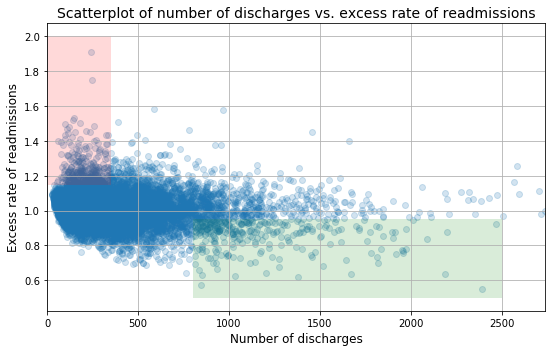

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?
The above analysis encourages an intiative for better resources to improve outcomes for patients and readmission rates which both are logically and statistically sound based on above data. However, they attempt to correlate smaller number of discharges to smaller hospitals and smaller hospitals to lacking of resources which are both large assumptions. Also the scatter plot tends to point the attention to the blue and red region where the analyst made a conclusion that there is "significant' correlation between excess rate of admission and number of discharge. The analyst completely ignored the major data points and only focus on the outliers to make generalization which could be misleading. His conclusion is completely unfounded without any test statistic performed. 


Also, the ratio used to calculate high readmission is vague. Firstly it's calculated from predicted values which could deviate from the actual value significantly. Secondly ratios tend to have more radical change when the denominator is small. For example a change of one for the numerator of 8/10 has a 10% change as opposed to the change of one for 800/1000

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1. Setup an appropriate hypothesis test.
Ho: the mean excessive rate for less than 100 discharge = the mean excessive rate for more than 1000 discharge
<br>Ha: the mean excessive rate for less than 100 discharge < the mean excessive rate for more than 1000 discharge
<br> significant level = 0.01

### 2. Compute and report the observed significance value (or p-value).

In [5]:
#extract needed data and explore the data info
df_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
df_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
y_1000 = df_1000['Excess Readmission Ratio']
y_100 = df_100['Excess Readmission Ratio']
pd.DataFrame(y_1000).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 11757 to 13666
Data columns (total 1 columns):
Excess Readmission Ratio    463 non-null float64
dtypes: float64(1)
memory usage: 7.2 KB


In [6]:
#It shows 81 rows have null data which means they predicted 0 readmission, which makes no sense
pd.DataFrame(y_100).info()
y_100 = y_100[81:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1269 entries, 16857 to 4449
Data columns (total 1 columns):
Excess Readmission Ratio    1188 non-null float64
dtypes: float64(1)
memory usage: 19.8 KB


In [7]:
#basic descriptive statistics on the Excess Readmission Ratio
y_1000.describe()

count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64

In [8]:
y_100.describe()

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

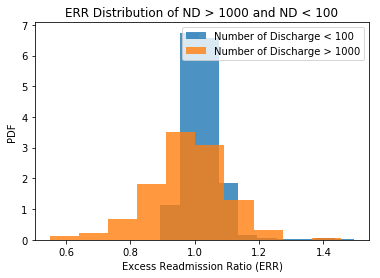

In [9]:
#normalized histogram
_ = plt.hist(y_100, bins = 10, normed = True, alpha = 0.8)
_ = plt.hist(y_1000, bins = 10, normed = True, alpha = 0.8)
plt.xlabel('Excess Readmission Ratio (ERR)')
plt.ylabel('PDF')
plt.title('ERR Distribution of ND > 1000 and ND < 100')
plt.legend(('Number of Discharge < 100', 'Number of Discharge > 1000'))

In [10]:
y_100_1000 = pd.concat([y_100,y_1000], ignore_index = True)
diff = np.mean(y_100) - np.mean(y_1000)
bootstrap = []
for i in range(10000):
    boot = np.random.choice(y_100_1000, size = len(y_100_1000))
    boot_100 = boot[:len(y_100)]
    boot_1000 = boot[len(y_100):]
    mean_diff = np.mean(boot_100) - np.mean(boot_1000)
    bootstrap.append(mean_diff)

In [11]:
p_value = np.sum(bootstrap >= diff)/len(bootstrap)
print('The p-value evaluated from data is ' + str(p_value))

The p-value evaluated from data is 0.0


### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

With a p-value of 0.0, we reject the null hypothesis and accept the alternative hypothesis that there is a difference between the average excessive readmission rate for >1000 discharge and that for  <100 discharge.

Statistically this p-value is significant in rejecting the null hypothesis with given significant value. Practically its arguably significant since the number of sample used for the study is less than 2000 data points. However, in practice looking at the difference between 1.02 and 0.98 excess readmission rate, the difference is so small that it may not have practical implications. It may be better to isolate the outliers from the data and fix the issues standing at the facilities instead of generalizing to all hospitals with < 100 discharge

### 5. Look at the scatterplot above.
####  What are the advantages and disadvantages of using this plot to convey information?
The plot shows all the data points and shows the outliers very clearly. However, there is excess overlapping points to identify trends in the plot and unused data to convey the significance between the two discharge rates.

#### Construct another plot that conveys the same information in a more direct manner.

C:\Users\sadmin\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


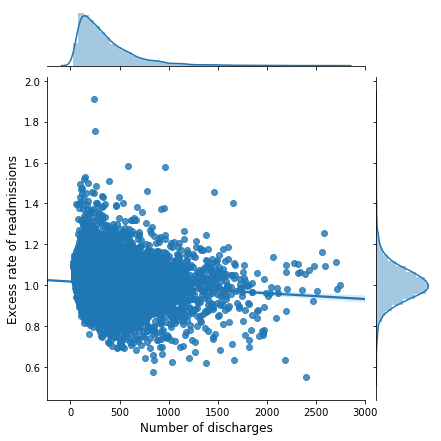

In [12]:
import seaborn as sns
sns.jointplot(x = x, y = y, kind = 'reg')
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)

With the regression line, we can observe a clear reduction of readmission rate as a function of discharge, conveying the analysis original message. Another method is to use a box and whisker plot to show the percentiles

In [27]:
dfy_100 = pd.DataFrame(y_100)
dfy_100['type'] = '<100'
dfy_1000 = pd.DataFrame(y_1000)
dfy_1000['type'] = '>1000'
dfy_100_1000 = pd.concat([dfy_100, dfy_1000])

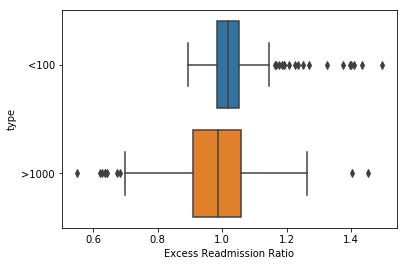

In [30]:
sns.boxplot(x = 'Excess Readmission Ratio', y = 'type', data = dfy_100_1000)